# 0.9.7

In [1]:
v7 = %run lmfit_7/bin/activate_this.py
#!pip3 install lmfit==0.9.7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
lmfit.__version__

'0.9.7'

In [3]:
def fct_velocity (x, bino, start_anti, v_anti, latence, tau, maxi) :
    v_anti = v_anti/1000 # pour passer de sec à ms
    time = np.arange(len(x))
    vitesse = []

    for t in range(len(time)):
        if start_anti >= latence :
            if time[t] < latence :
                vitesse.append(0)
            else :
                vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence))))
        else :
            if time[t] < start_anti :
                vitesse.append(0)
            else :
                if time[t] < latence :
                    vitesse.append((time[t]-start_anti)*v_anti)
                    x = (time[t]-start_anti)*v_anti
                else :
                    vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence)))+x)

    return vitesse

{'start_anti': 512.395335584866, 'v_anti': 3.281238800650385, 'latence': 1007.0076019295295, 'tau': 63.54401805656503, 'bino': 1, 'maxi': 1.8150158656645865}


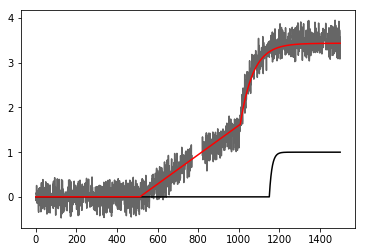

In [4]:
from lmfit import  Model, Parameters

x = np.arange(0,1500,1)
bino, start_anti, v_anti, latence, tau, maxi = 1, 500, 3, 1000, 60, 2

np.random.seed(7)

a = fct_velocity(x, bino, start_anti, v_anti, latence, tau, maxi)+np.random.rand(len(x))*0.5
a = a-np.random.rand(len(x))*0.5

a[770:820] =  np.arange(0,50,1)*np.nan

model = Model(fct_velocity)
params = Parameters()

params.add('tau', value=13., min=13., max=80.)
params.add('maxi', value=maxi-1, min=1., max=5.)
params.add('latence', value=latence+150, min=600, max=len(x))
params.add('start_anti', value=start_anti-500, min=0, max=600)
params.add('v_anti', value=v_anti-3, min=-40., max=40.)
params.add('bino', value=bino, vary=False)

result_deg = model.fit(a, params, x=x, fit_kws={'nan_policy': 'omit'})

plt.plot(a, c='k', alpha=0.6)
plt.plot(result_deg.init_fit, c='k')
plt.plot(result_deg.best_fit, c='r')

print(result_deg.values)

In [5]:
quit(v7)

# 0.9.9

In [1]:
v9 = %run lmfit_9/bin/activate_this.py
#!pip3 install lmfit==0.9.9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
lmfit.__version__

'0.9.9'

In [3]:
def fct_velocity (x, bino, start_anti, v_anti, latence, tau, maxi) :
    v_anti = v_anti/1000 # pour passer de sec à ms
    time = np.arange(len(x))
    vitesse = []

    for t in range(len(time)):
        if start_anti >= latence :
            if time[t] < latence :
                vitesse.append(0)
            else :
                vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence))))
        else :
            if time[t] < start_anti :
                vitesse.append(0)
            else :
                if time[t] < latence :
                    vitesse.append((time[t]-start_anti)*v_anti)
                    x = (time[t]-start_anti)*v_anti
                else :
                    vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence)))+x)

    return vitesse

{'start_anti': 5.388023360808347e-09, 'maxi': 1.6025157874805798, 'v_anti': 1.7316495255626734, 'tau': 40.90276236773941, 'bino': 1, 'latence': 1112.0412899824007}


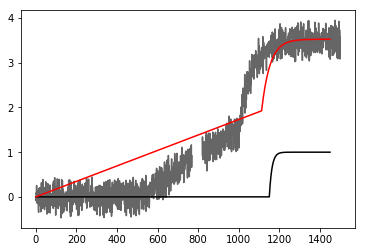

In [4]:
from lmfit import  Model, Parameters

x = np.arange(0,1500,1)
bino, start_anti, v_anti, latence, tau, maxi = 1, 500, 3, 1000, 60, 2

np.random.seed(7)

a = fct_velocity(x, bino, start_anti, v_anti, latence, tau, maxi)+np.random.rand(len(x))*0.5
a = a-np.random.rand(len(x))*0.5

a[770:820] =  np.arange(0,50,1)*np.nan

model = Model(fct_velocity)
params = Parameters()

params.add('tau', value=13., min=13., max=80.)
params.add('maxi', value=maxi-1, min=1., max=5.)
params.add('latence', value=latence+150, min=600, max=len(x))
params.add('start_anti', value=start_anti-500, min=0, max=600)
params.add('v_anti', value=v_anti-3, min=-40., max=40.)
params.add('bino', value=bino, vary=False)

result_deg = model.fit(a, params, x=x, nan_policy='omit')

plt.plot(a, c='k', alpha=0.6)
plt.plot(result_deg.init_fit, c='k')
plt.plot(result_deg.best_fit, c='r')

print(result_deg.values)

## Résolution !

In [5]:
def fct_velocity (x, bino, start_anti, v_anti, latence, tau, maxi) :
    v_anti = v_anti/1000 # pour passer de sec à ms
    time = x #np.arange(len(x))
    vitesse = []

    for t in range(len(time)):
        if start_anti >= latence :
            if time[t] < latence :
                vitesse.append(0)
            else :
                vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence))))
        else :
            if time[t] < start_anti :
                vitesse.append(0)
            else :
                if time[t] < latence :
                    vitesse.append((time[t]-start_anti)*v_anti)
                    x = (time[t]-start_anti)*v_anti
                else :
                    vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence)))+x)

    return vitesse

{'start_anti': 512.395335584866, 'maxi': 1.8150158656645865, 'v_anti': 3.281238800650385, 'tau': 63.54401805656503, 'bino': 1, 'latence': 1007.0076019295295}


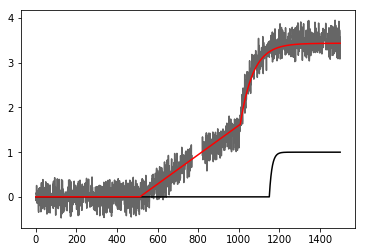

In [6]:
from lmfit import  Model, Parameters

x = np.arange(0,1500,1)
bino, start_anti, v_anti, latence, tau, maxi = 1, 500, 3, 1000, 60, 2

np.random.seed(7)

a = fct_velocity(x, bino, start_anti, v_anti, latence, tau, maxi)+np.random.rand(len(x))*0.5
a = a-np.random.rand(len(x))*0.5

a[770:820] =  np.arange(0,50,1)*np.nan

model = Model(fct_velocity)
params = Parameters()

params.add('tau', value=13., min=13., max=80.)
params.add('maxi', value=maxi-1, min=1., max=5.)
params.add('latence', value=latence+150, min=600, max=len(x))
params.add('start_anti', value=start_anti-500, min=0, max=600)
params.add('v_anti', value=v_anti-3, min=-40., max=40.)
params.add('bino', value=bino, vary=False)

result_deg = model.fit(a, params, x=x, nan_policy='omit')

plt.plot(a, c='k', alpha=0.6)


init_fit = fct_velocity(x, bino, start_anti-500, v_anti-3, latence+150, 13., maxi-1)
best_fit = fct_velocity(x, bino, result_deg.values['start_anti'], result_deg.values['v_anti'], result_deg.values['latence'], result_deg.values['tau'], result_deg.values['maxi'])

plt.plot(init_fit, c='k')
plt.plot(best_fit, c='r')

print(result_deg.values)

In [7]:
quit(v9)